<a href="https://colab.research.google.com/github/hkaido0718/IncompleteDiscreteChoice/blob/main/Ex_HeterogeneousChoiceSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discrete Choice with Heterogeneous Choice Sets

Consider choosing an option from an unobserved choice set $C\subset\{1,\dots,J\}$ (e.g., insurance plans with different deductibles and premia). Each individual draws their own choice set $C$ and chooses the alternative that maximizes their utility $W_j(x_j,U;\theta),j\in C$.


# An illustrative example.

Suppose the utility from alternative $j$ is
\begin{align*}
W_j(x_j;\theta)+U_j
\end{align*}
Following Barseghyan et al. (2021), we leave the choice set formation process specification flexible. The only restriction we impose is $|C|\ge \kappa$ for a known $\kappa\ge 2$.

For example, suppose $J=3$ and $\kappa=2$. Then, we only assume that the choice set contains at least two alternatives. How the individuals draw $C$ is allowed to be related to their preferences and observable characteristics, but we do not model the choice set formation process. The model's prediction is

$$G(u|x;\theta)=\Big\{j:j\in \text{argmax}_{k\in C}W_k(x_k;\theta)+u_k, \text{ for some }C, |C|\ge 2\Big\}.$$

Now, let's see when $Y=3$ is chosen. There are a few possibilities
- Alternative 3 maximizes $W_j(x_j;\theta)+U_j$ among all alternatives (i.e., $C=\{1,2,3\}$);
- Alternative 3 is preferred to alternative 1 and $C=\{1,3\}$;
- Alternative 3 is preferred to alternative 2 and $C=\{2,3\}$.

We allow all scenarios. Hence, $j=3$ being chosen is consistent with some choice set as long as
\begin{align*}
\Delta_{23}W(x;\theta)+\Delta_{23}u&\le 0
\end{align*}
or
\begin{align*}
\Delta_{13}W(x;\theta)+\Delta_{13}u&\le 0,
\end{align*}
where $\Delta_{23}W(x;\theta)=W_2(x;\theta)-W_3(x;\theta)$ and $\Delta_{23}u=u_2-u_3$. This region is plotted below.

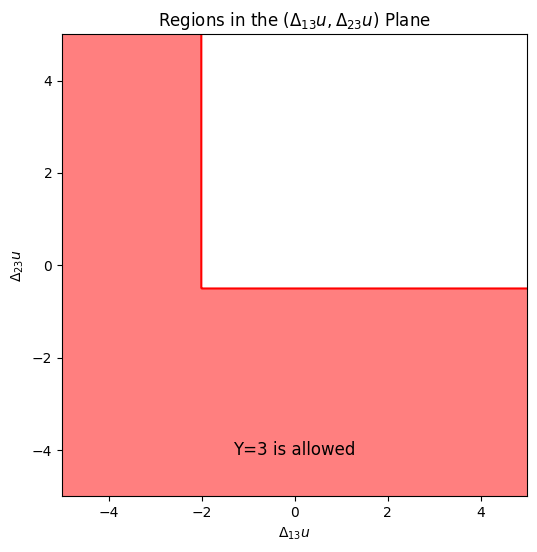

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the parameters
delta23_x_theta = 0.5  # Replace with actual value
delta13_x_theta = 2.0  # Replace with actual value

# Define the range for the plot
u_min, u_max = -5, 5
v_min, v_max = -5, 5

# Create the grid for plotting
delta13_u = np.linspace(u_min, u_max, 400)
delta23_u = np.linspace(v_min, v_max, 400)
delta13_u, delta23_u = np.meshgrid(delta13_u, delta23_u)

# Compute the regions
region = np.zeros(delta13_u.shape, dtype=int)
region[(delta23_x_theta + delta23_u <= 0) | (delta13_x_theta + delta13_u <= 0)] = 1

# Plot the region
plt.figure(figsize=(6, 6))
contour = plt.contour(delta13_u, delta23_u, region, levels=[0.5], colors='red')
plt.contourf(delta13_u, delta23_u, region, levels=[0.5, 1], colors=['red'], alpha=0.5)

# Remove the background
plt.gca().patch.set_color('white')
plt.title('Regions in the $(\Delta_{13}u, \Delta_{23}u)$ Plane')
plt.text(0, -4, 'Y=3 is allowed', fontsize=12, ha='center', va='center')
plt.xlabel('$\Delta_{13}u$')
plt.ylabel('$\Delta_{23}u$')
plt.show()

Similarly, $Y$=2 is permissible if
- Alternative 2 maximizes $W_j(x_j;\theta)+U_j$ among all alternatives (i.e., $C=\{1,2,3\}$);
- Alternative 2 is preferred to alternative 1 and $C=\{1,2\}$;
- Alternative 2 is preferred to alternative 3 and $C=\{2,3\}$.

As in the previous case, $Y=2$ is therefore permissible as long as
\begin{align*}
\Delta_{12}W(x;\theta)+\Delta_{12}u&\le 0
\end{align*}
or
\begin{align*}
\Delta_{23}W(x;\theta)+\Delta_{23}u&\ge 0.
\end{align*}

Note that $\Delta_{12}u=\Delta_{13}u-\Delta_{23}u$. Hence, we may re-write the conditions as
\begin{align*}
\Delta_{13}W(x;\theta)-\Delta_{23}W(x;\theta)+\Delta_{13}u-\Delta_{23}u&\le 0
\end{align*}
or
\begin{align*}
\Delta_{23}W(x;\theta)+\Delta_{23}u&\ge 0.
\end{align*}
Let's plot the region again.

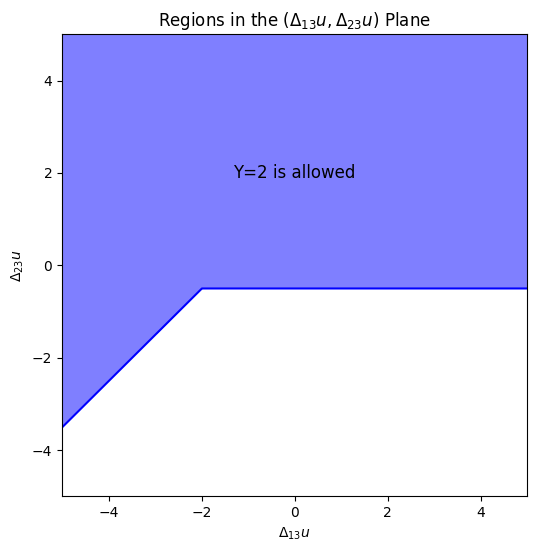

In [ ]:
# Compute the regions
region = np.zeros(delta13_u.shape, dtype=int)
region[(delta13_x_theta - delta23_x_theta + delta13_u - delta23_u <= 0) | (delta23_x_theta + delta23_u >= 0)] = 1

# Plot the region
plt.figure(figsize=(6, 6))
contour = plt.contour(delta13_u, delta23_u, region, levels=[0.5], colors='blue')
plt.contourf(delta13_u, delta23_u, region, levels=[0.5, 1], colors=['blue'], alpha=0.5)

# Remove the background
plt.gca().patch.set_color('white')
plt.title('Regions in the $(\Delta_{13}u, \Delta_{23}u)$ Plane')
plt.text(0, 2, 'Y=2 is allowed', fontsize=12, ha='center', va='center')
plt.xlabel('$\Delta_{13}u$')
plt.ylabel('$\Delta_{23}u$')
plt.show()

Finally, a similar analysis suggests $Y=1$ is permissible when
\begin{align*}
\Delta_{13}W(x;\theta)-\Delta_{23}W(x;\theta)+\Delta_{13}u-\Delta_{23}u&\ge 0
\end{align*}
or
\begin{align*}
\Delta_{13}W(x;\theta)+\Delta_{13}u&\ge 0,
\end{align*}
which is plotted below.

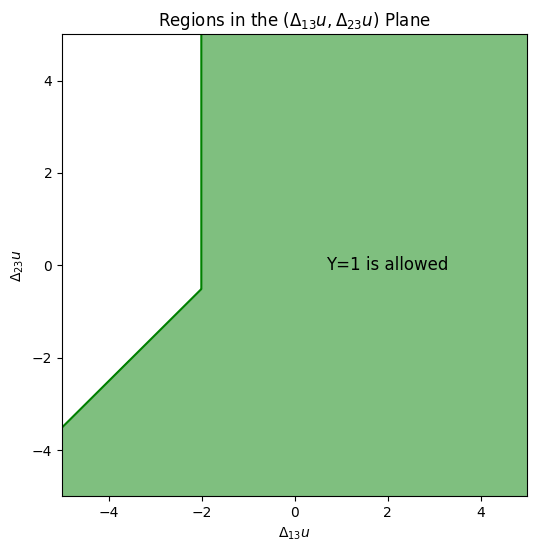

In [ ]:
# Compute the regions
region = np.zeros(delta13_u.shape, dtype=int)
region[(delta13_x_theta - delta23_x_theta + delta13_u - delta23_u >= 0) | (delta13_x_theta + delta13_u >= 0)] = 1

# Plot the region
plt.figure(figsize=(6, 6))
contour = plt.contour(delta13_u, delta23_u, region, levels=[0.5], colors='green')
plt.contourf(delta13_u, delta23_u, region, levels=[0.5, 1], colors=['green'], alpha=0.5)

# Remove the background
plt.gca().patch.set_color('white')
plt.title('Regions in the $(\Delta_{13}u, \Delta_{23}u)$ Plane')
plt.text(2, 0, 'Y=1 is allowed', fontsize=12, ha='center', va='center')
plt.xlabel('$\Delta_{13}u$')
plt.ylabel('$\Delta_{23}u$')
plt.show()

Putting the regions together, the model prediction is as follows
\begin{align*}
G(u|x;\theta)=\begin{cases}
\{1,2\} & \text{ if } \Delta_{13}u \ge -\Delta_{13}W(x;\theta),~\Delta_{23}u\ge - \Delta_{23}W(x;\theta), \\
\{2,3\} & \text{ if }\Delta_{13}u\le -\Delta_{13}W(x;\theta),~\Delta_{13}u-\Delta_{23}u\le -(\Delta_{13}W(x;\theta)-\Delta_{23}W(x;\theta))\\
\{1,3\} & \text{ if } \Delta_{23}u\le -\Delta_{23}W(x;\theta),~\Delta_{13}u-\Delta_{23}u\ge -(\Delta_{13}W(x;\theta)-\Delta_{23}W(x;\theta))
\end{cases}
\end{align*}
So, the $U$-nodes consist of 3 regions plotted below.

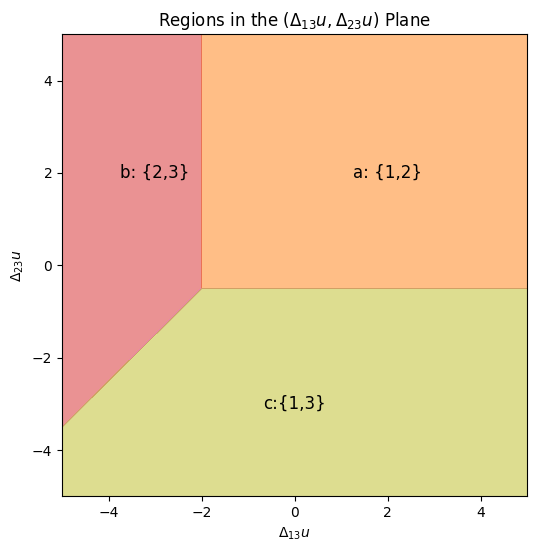

In [ ]:
# Compute the regions based on the conditions
regions = np.zeros(delta13_u.shape, dtype=int)
regions[(delta13_u >= -delta13_x_theta) & (delta23_u >= -delta23_x_theta)] = 1
regions[(delta13_u <= -delta13_x_theta) & (delta13_u - delta23_u <= -(delta13_x_theta - delta23_x_theta))] = 2
regions[(delta23_u <= -delta23_x_theta) & (delta13_u - delta23_u >= -(delta13_x_theta - delta23_x_theta))] = 3

# Plot the regions
plt.figure(figsize=(6, 6))
plt.contourf(delta13_u, delta23_u, regions, levels=3, alpha=0.5, cmap='tab10')
plt.title('Regions in the $(\Delta_{13}u, \Delta_{23}u)$ Plane')
plt.xlabel('$\Delta_{13}u$')
plt.ylabel('$\Delta_{23}u$')

# Add labels to the regions
region_labels = ['a: {1,2}', 'b: {2,3}', 'c:{1,3}']
label_positions = [
    (2, 2),    # Region 1
    (-3, 2),  # Region 2
    (0, -3)    # Region 3
]

for label, (x, y) in zip(region_labels, label_positions):
    plt.text(x, y, label, fontsize=12, ha='center', va='center')

plt.xlim(u_min, u_max)
plt.ylim(v_min, v_max)
plt.grid(False)
plt.show()

Let's represent the model by a graph. We first load the idc library.

In [1]:
!git clone https://github.com/hkaido0718/IncompleteDiscreteChoice.git

Cloning into 'IncompleteDiscreteChoice'...
remote: Enumerating objects: 391, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 391 (delta 63), reused 59 (delta 34), pack-reused 293 (from 1)
Receiving objects: 100% (391/391), 647.98 KiB | 13.79 MiB/s, done.
Resolving deltas: 100% (225/225), done.


Here are the Y and U nodes and the links between them.

In [3]:
!pip install scikit-optimize

In [4]:
import IncompleteDiscreteChoice.idclib as idc

# Define the Y-nodes, U-nodes, and edges
Y_nodes = [1,2,3]
U_nodes = ['a', 'b', 'c']
edges = [('a',1),
         ('a',2),
         ('b',2),
         ('b',3),
         ('c',1),
         ('c',3)]

# Define the model
gmodel = idc.BipartiteGraph(Y_nodes, U_nodes, edges)

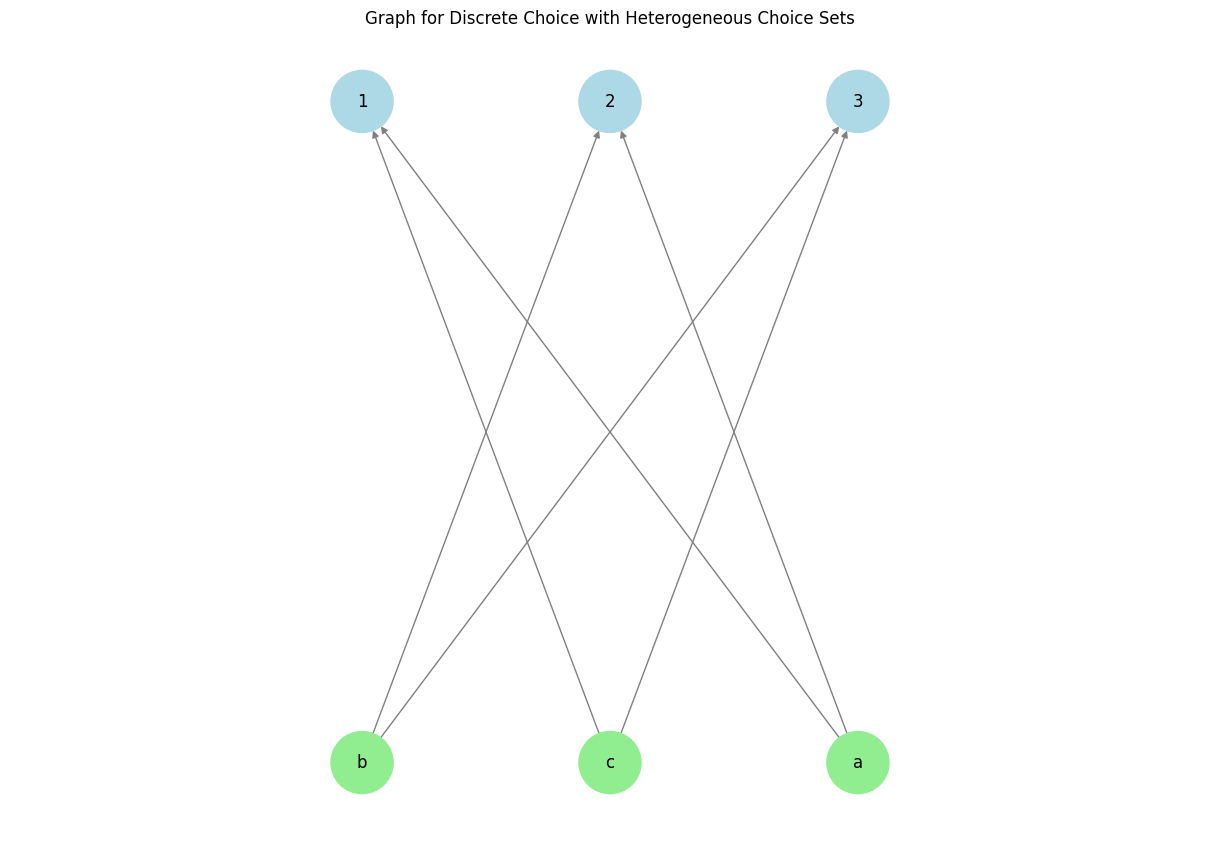

In [5]:
gmodel.plot_graph(title='Graph for Discrete Choice with Heterogeneous Choice Sets')

Now let's compute the sharp identifying restrictions.


In [6]:
import numpy as np

# Define probabilities for the U-nodes
Ftheta = np.array([0.3, 0.5, 0.2])  # Example probabilities corresponding to U_nodes

# Use the calculate_sharp_lower_bound to calculate probabilities.
results,sharp_lower_bounds = gmodel.calculate_sharp_lower_bound(Ftheta)

# Show results
idc.print_table(results)

Subset of Y-nodes        Exclusive U-nodes   Sharp Lower Bound  
{1, 2}                   {'a'}               0.300              
{1, 3}                   {'c'}               0.200              
{2, 3}                   {'b'}               0.500              
{1, 2, 3}                {'b', 'c', 'a'}     1.000              


# References
- Barseghyan, L., Coughlin, M., Molinari, F. and Teitelbaum, J.C. (2021), Heterogeneous Choice Sets and Preferences. _Econometrica_, 89: 2015-2048. https://doi.org/10.3982/ECTA17448